In [2]:
%load_ext autoreload
%autoreload 2

In [63]:
import torch
from torch import optim

from datasets import get_mnist_dataset, get_data_loader
from utils import *
from adversarial import *

from basic import BasicNetwork
from cnn import CNN

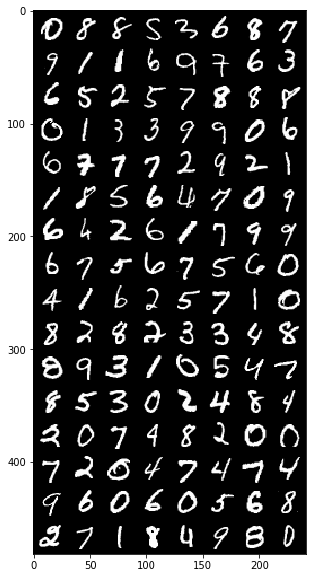

In [29]:
trainset, testset = get_mnist_dataset()
trainloader, testloader = get_data_loader(trainset, testset)
batch, labels = next(iter(trainloader))
plot_batch(batch)

In [6]:
net = BasicNetwork().cuda()
print(count_params(net))

trainer = Trainer(net, optim.Adam(net.parameters()), nn.CrossEntropyLoss(),
                  trainloader, testloader, use_cuda=True)

79510


In [7]:
trainer.run(epochs=5)

[*] Training for 5 epochs
[*] Epoch 1, TrnLoss: 0.433, TrnAcc: 0.890, TstLoss: 0.234, TstAcc: 0.934
[*] Epoch 2, TrnLoss: 0.204, TrnAcc: 0.941, TstLoss: 0.167, TstAcc: 0.951
[*] Epoch 3, TrnLoss: 0.151, TrnAcc: 0.957, TstLoss: 0.132, TstAcc: 0.962
[*] Epoch 4, TrnLoss: 0.119, TrnAcc: 0.967, TstLoss: 0.112, TstAcc: 0.968
[*] Epoch 5, TrnLoss: 0.098, TrnAcc: 0.971, TstLoss: 0.101, TstAcc: 0.971


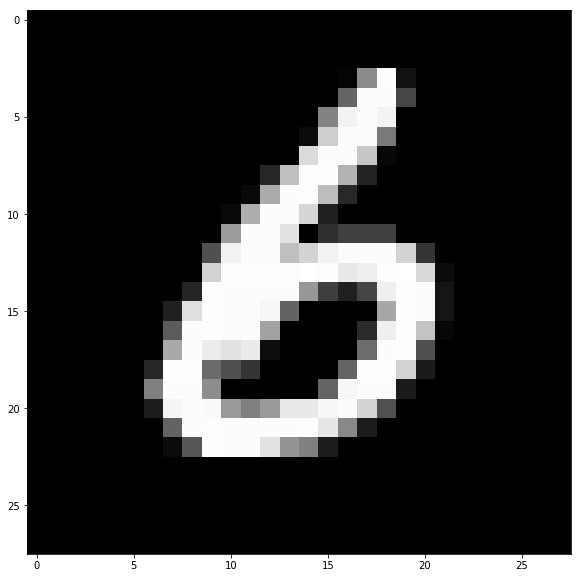

In [32]:
img = batch[5]
plot_tensor(img)

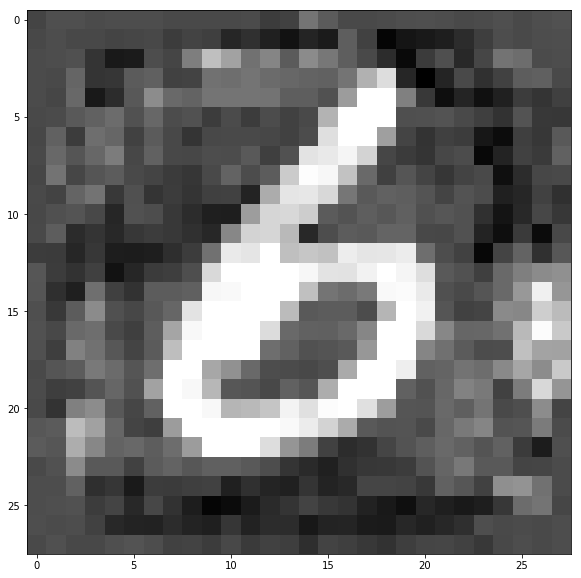

In [87]:
fool_img = generate_fooling_image(net, img.cuda(), target=2, n_iters=1000).cpu()
plot_tensor(fool_img)

In [88]:
out = net(Variable(fool_img.cuda()))
print(out)
print(out.max(1)[1].data[0])

Variable containing:

Columns 0 to 7 
-10.9346  -4.4634  42.9072  -0.7240   1.9385 -22.9799  -0.5867 -20.7521

Columns 8 to 9 
-18.8166 -45.1843
[torch.cuda.FloatTensor of size 1x10 (GPU 0)]

2


In [72]:
tiny_model = CNN().cuda()
print(count_params(tiny_model))

tiny_optimizer = optim.Adam(tiny_model.parameters())
tiny_loss = nn.CrossEntropyLoss()
tiny_trainer = Trainer(tiny_model, tiny_optimizer, tiny_loss,
                       trainloader, testloader, use_cuda=True)

246506


In [74]:
tiny_trainer.run(epochs=5)

[*] Training for 5 epochs
[*] Epoch 1, TrnLoss: 0.116, TrnAcc: 0.966, TstLoss: 0.039, TstAcc: 0.986
[*] Epoch 2, TrnLoss: 0.034, TrnAcc: 0.989, TstLoss: 0.034, TstAcc: 0.989
[*] Epoch 3, TrnLoss: 0.026, TrnAcc: 0.992, TstLoss: 0.104, TstAcc: 0.969
[*] Epoch 4, TrnLoss: 0.022, TrnAcc: 0.993, TstLoss: 0.034, TstAcc: 0.989
[*] Epoch 5, TrnLoss: 0.015, TrnAcc: 0.995, TstLoss: 0.025, TstAcc: 0.993


In [89]:
out = tiny_model(Variable(img.cuda()[None, ...]))
print(out)
print(out.max(1)[1].data[0])

Variable containing:

Columns 0 to 7 
  8.0628  -6.4635  -3.5353  -0.0441  -5.2539   6.2009  20.9995 -16.3008

Columns 8 to 9 
  1.2823  -8.6181
[torch.cuda.FloatTensor of size 1x10 (GPU 0)]

6


In [90]:
out = tiny_model(Variable(fool_img.cuda()[None, ...]))
print(out)
print(out.max(1)[1].data[0])

Variable containing:

Columns 0 to 7 
  6.6809  -6.0384   3.2679   4.5459  -8.5729   3.6568  17.2316 -16.7219

Columns 8 to 9 
  2.6719 -10.1913
[torch.cuda.FloatTensor of size 1x10 (GPU 0)]

6


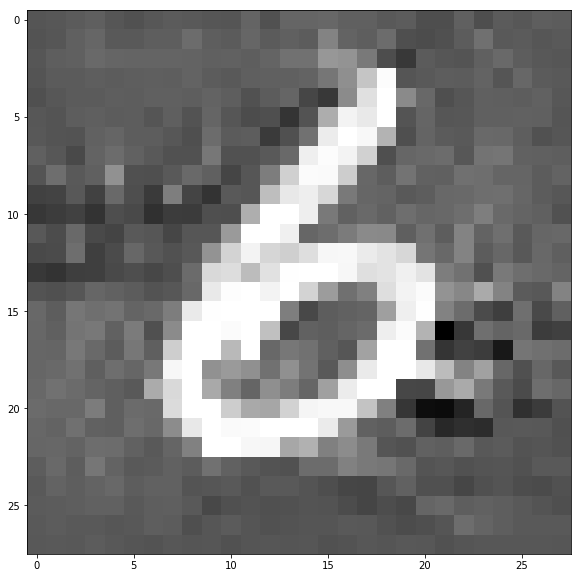

In [100]:
fool_img_cnn = generate_fooling_image(tiny_model, img.cuda()[None, ...], target=2, n_iters=750).cpu()
plot_tensor(fool_img_cnn[0])

In [101]:
out = tiny_model(Variable(fool_img_cnn.cuda()))
print(out)
print(out.max(1)[1].data[0])

Variable containing:

Columns 0 to 7 
  8.9266  -1.2624  23.8029  -5.9173   0.9415 -13.6555  13.3812 -12.4733

Columns 8 to 9 
  1.9267 -14.0419
[torch.cuda.FloatTensor of size 1x10 (GPU 0)]

2


## Observation -- even with a fairly complex CNN it takes a very large perturbation to fool the network (using MNIST and gradient ascent perturbations)